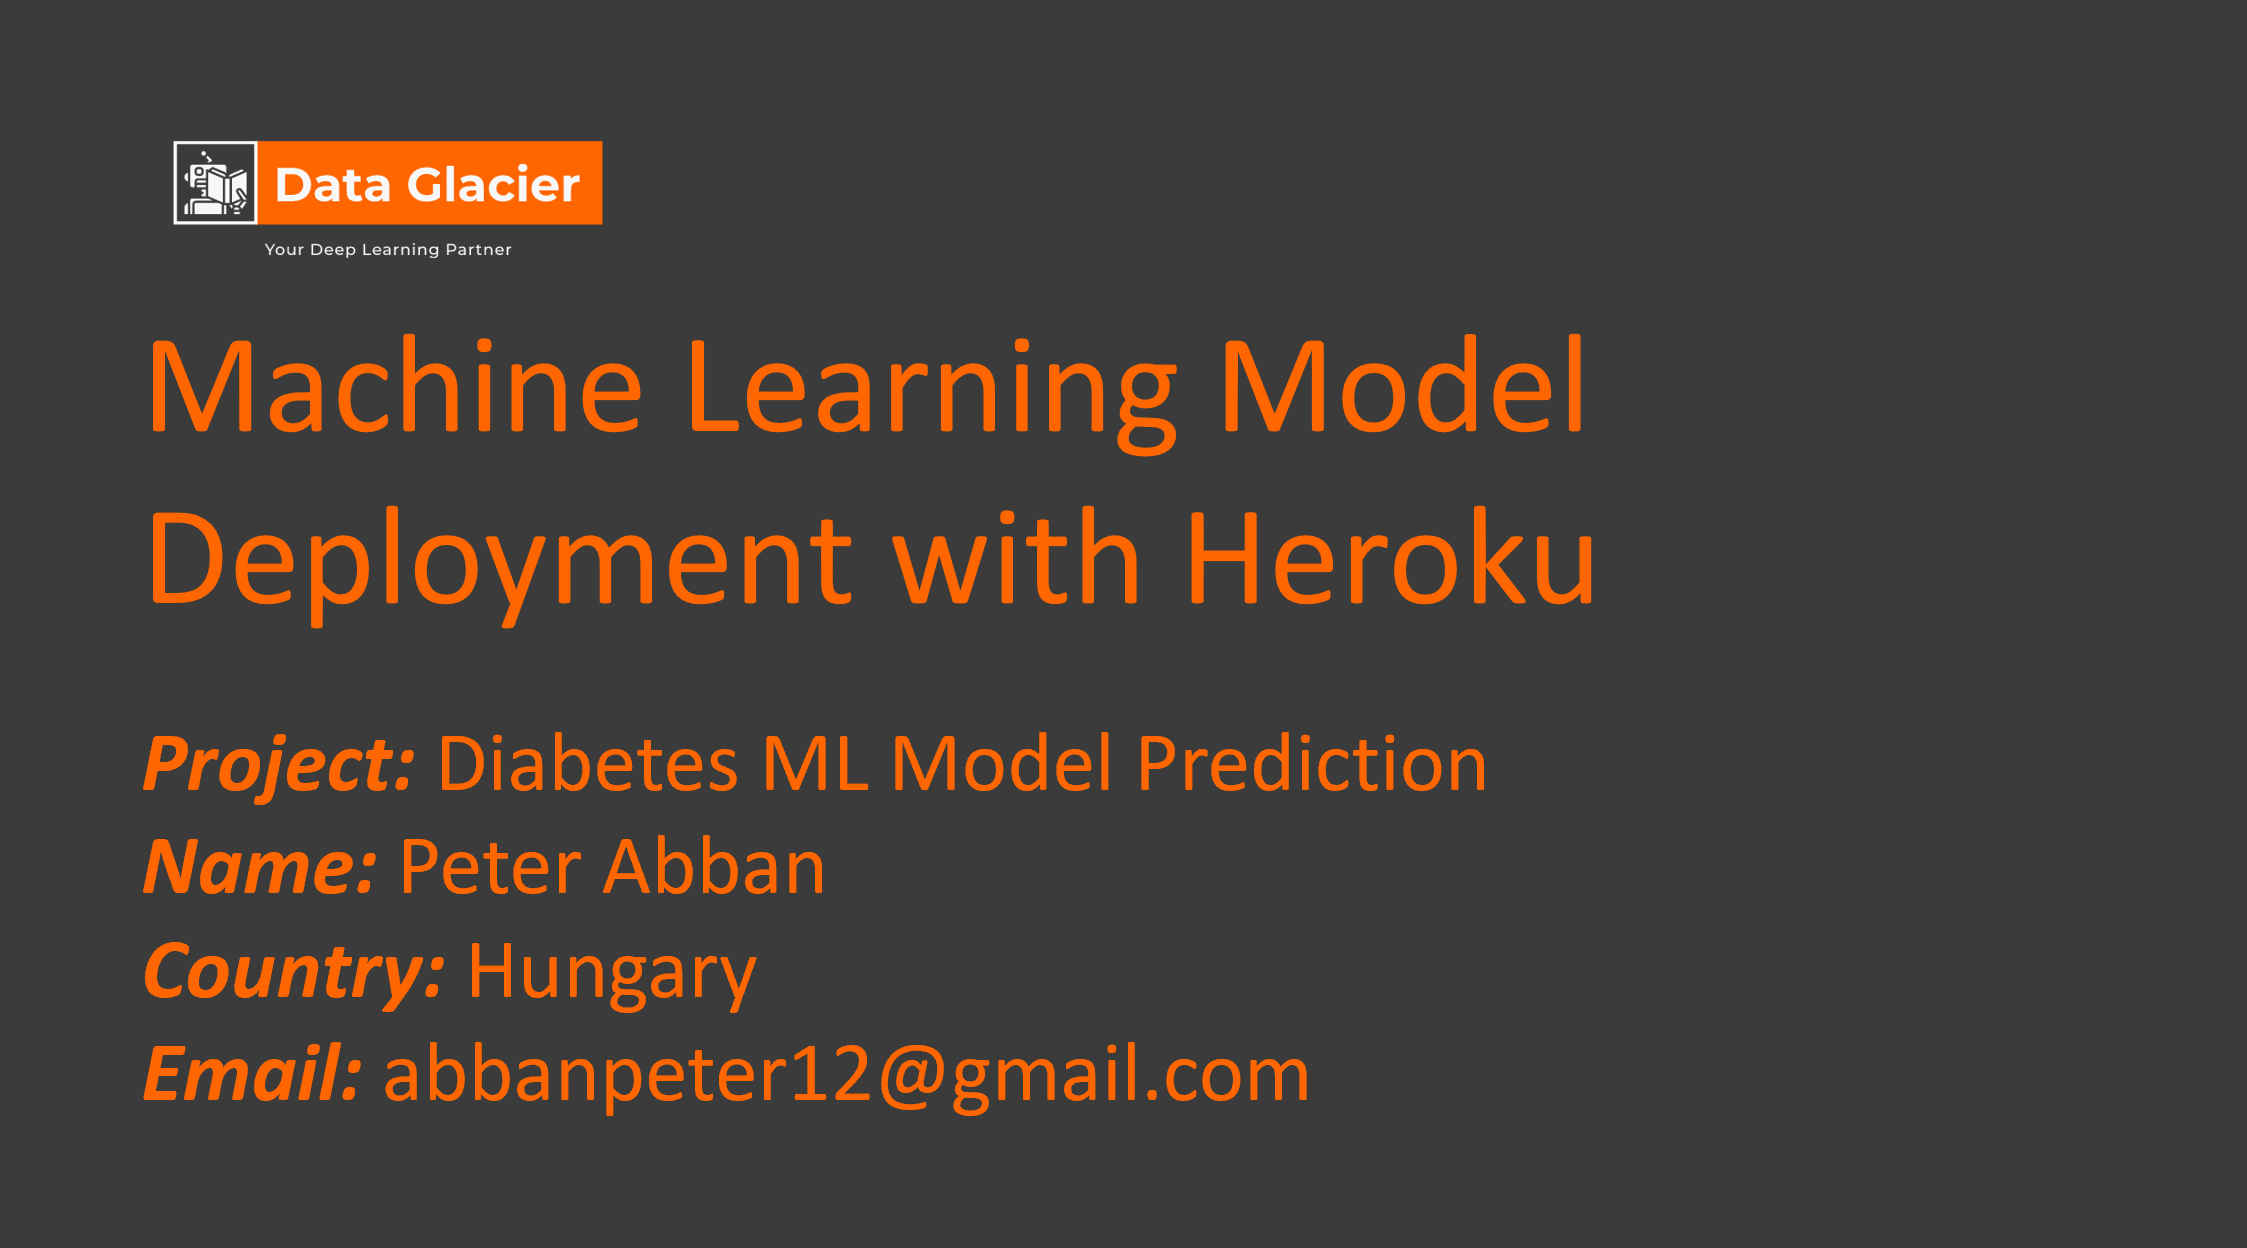

# **Project: Diabetics Model Prediction**

## I. **Project Details:**

**The Project Focuses on the Analysis, and ML Model Building and Deployment of on Diabetes Dataset**

## II. **Dataset Description** 

**This is a **_multivariate_** medical dataset that contains the diabetic information of different patients, the dataset contains **_768 row features of the individual patients_** and 
**_9 column features_**** [Datasource](https://www.kaggle.com/code/sandragracenelson/diabetes-prediction/notebook)

* **_Pregnancies_: Number of times pregnant**  
* **_Glucose_: Plasma glucose concentration, a 2 hours in an oral glucose tolerance test**
* **_Blood Pressure_: Diastolic blood pressure (mm Hg)**
* **_SkinThickness_: Triceps skin fold thickness (mm)**
* **_Insulin_: 2-Hour serum insulin (mu U/ml)**
* **_BMI_: Body mass index (weight in kg/(height in m)^2)**
* **_DiabetesPedigreeFunction_: Diabetes pedigree function**
* **_Age_: Age (years)**
* **_Outcome_: Class variable (0 or 1)**

## 1. **Importing the Dependencies:**

In [218]:
# General Data manipulation models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing Models
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

#  Model Loading
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Metric Measurement
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
plt.style.use("ggplot")
pd.set_option("display.max_columns", 200)
print("All library loaded successfully")

All library loaded successfully


## 2. **Loading  Dataset:**

In [219]:
diab_data = pd.read_csv("diabetes.csv")

## 3. Feature Enginering Process: **_Understanding Dataset_**
 * **Head or First 5 rows of data**
 * **Size of dataset: shape**
 * **Data columns**
 * **Data types and the number of these categorical: Nominal and Ordinal data types:**
 * **Information about dataset**
 * **Statistical description of dataset**
 * **Checking for NaN or missing values and sort in ascending order for clarity**

### i. **Head or First 5 rows of data**

In [220]:
diab_data.head(5) # First 5 rows of dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### **ii. Size of dataset: shape**

In [221]:
diab_data.shape

(768, 9)

#### Dataset is made of **_768 rows_** and **_9 feature columns_**

### **iii. Data Columns**

In [222]:
diab_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### **iv. Information About Dataset**

In [223]:
diab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### **_Observation_**: The feature columns of the dataset have each 768 row features indicating non-null values in all rows

### **v. Data Types and the Number of These Categories: Nominal and ordinal Data Types:**

In [224]:
num_int = diab_data.select_dtypes(include = ["int"]).columns.to_list() # This checks the specific data types of the columns features

In [225]:
num_int

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'Age',
 'Outcome']

In [226]:
len(num_int) # Number of int data types

7

### **vi. Statistical Description of Dataset**

In [227]:
diab_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## 4. Feature Enginering Process: **_First Data Cleaning Steps_**

*  **Identifying duplicates: General duplicates checking**
*  **Dropping off irrelevant columns or applying data imputation**
*  **Changing of misappropriated data types**
*  **Renaming data columns if necessary**
*  **Checking for missing valus or NaN values**
*  **Checking for Duplicates by individual column feature names**
*  **Column splitting if necessary for clarity**
*  **Feature creation**
*  **Replacement of regular expressions if any feature columns**
*  **Proper alignment or positioning of feature columns**

### **i. Identifying Duplicates: General Duplicates Checking**

In [228]:
diab_data.duplicated(keep ="first").value_counts()

False    768
Name: count, dtype: int64

#### **_Observation_**: **There are no duplicates in the dataset**

### **ii. Dropping off irrelevant columns or applying data imputation**

#### **_Observation_**: **All feature columns remain relevant for data exploration and machine learning predictions**

### **ii. Renaming Data Columns if Necessary**

In [229]:
diab_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [230]:
diab_data.rename({"BloodPressure":"Blood Pressure", "SkinThickness": "Skin Thickness", "DiabetesPedigreeFunction": "Diabetes Pedigree Function",
                  "Outcome": "Target"}, inplace = True, axis = 1)

In [231]:
diab_data.head(5)

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### **iii. All other neccessary data cleaning steps toward feature engineering remain reserved**

## 5. Feature Enginering Process: **_Data Visualization_**

In [232]:
diab_data["Pregnancies"].value_counts().sort_values(ascending = False)

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

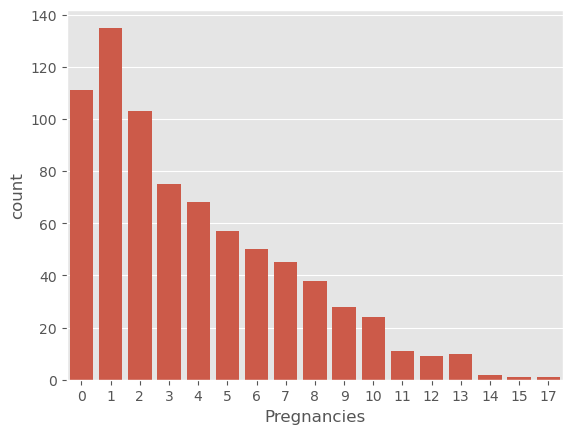

In [233]:
# Making a distribution of the Pregnancies
sns.countplot(data = diab_data, x = "Pregnancies",)
plt.show()

#### **Observation**: 
* **Individuals with first time pregnanacy**: **_135 counts_**  
* **Individuals with No pregnancy**: **_111 counts_**
* **Individuals with 15 and 17 times pregnant**: **_1 counts_ - Rare case**


C:\Users\hp\AppData\Local\Temp\ipykernel_49760\2550375889.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diab_data["Age"])


<Axes: xlabel='Age', ylabel='Density'>

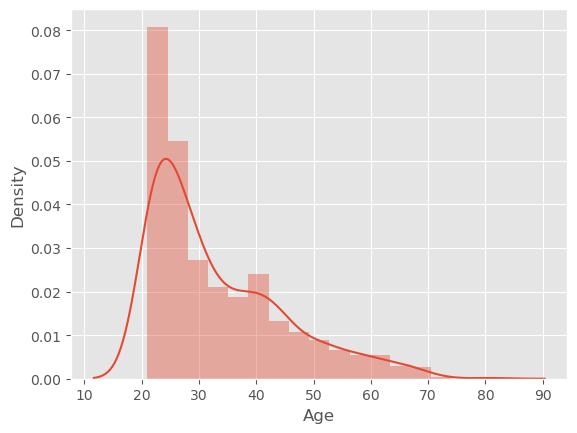

In [234]:
### Distribution of the Age group
sns.distplot(diab_data["Age"])

#### **_Observation_**:  
#### _We have higner number of people with the age group of 20-30's_

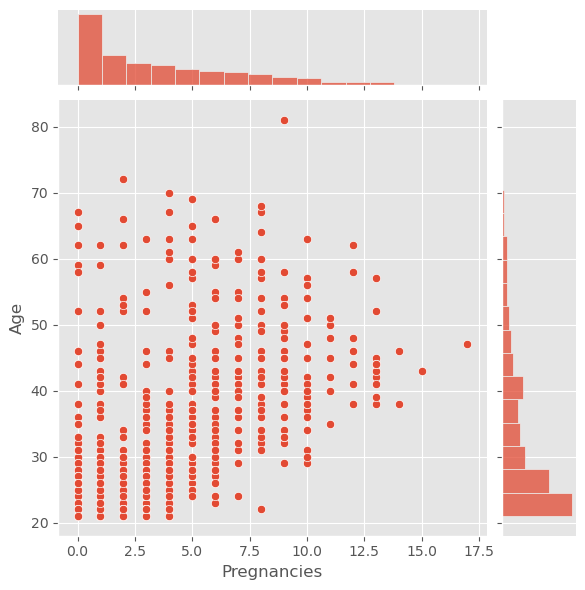

In [235]:
### Joint Plot of Pregnancy and Age
sns.jointplot(data = diab_data, x = "Pregnancies", y = "Age",)

#### **_Observation_**:  
 * **Higher Population of people with _no pregnancies falls within the age _group: 20-40__ with few ones from _50-70_ years**
 * **More People  _get pregnant within the age _group: 20-50 years__, with few pregnancies _above 50 years_.**
 * **Rare cases of people who have been _pregnant 15 and 17 times_ fall within the age group of _40-50 years_**

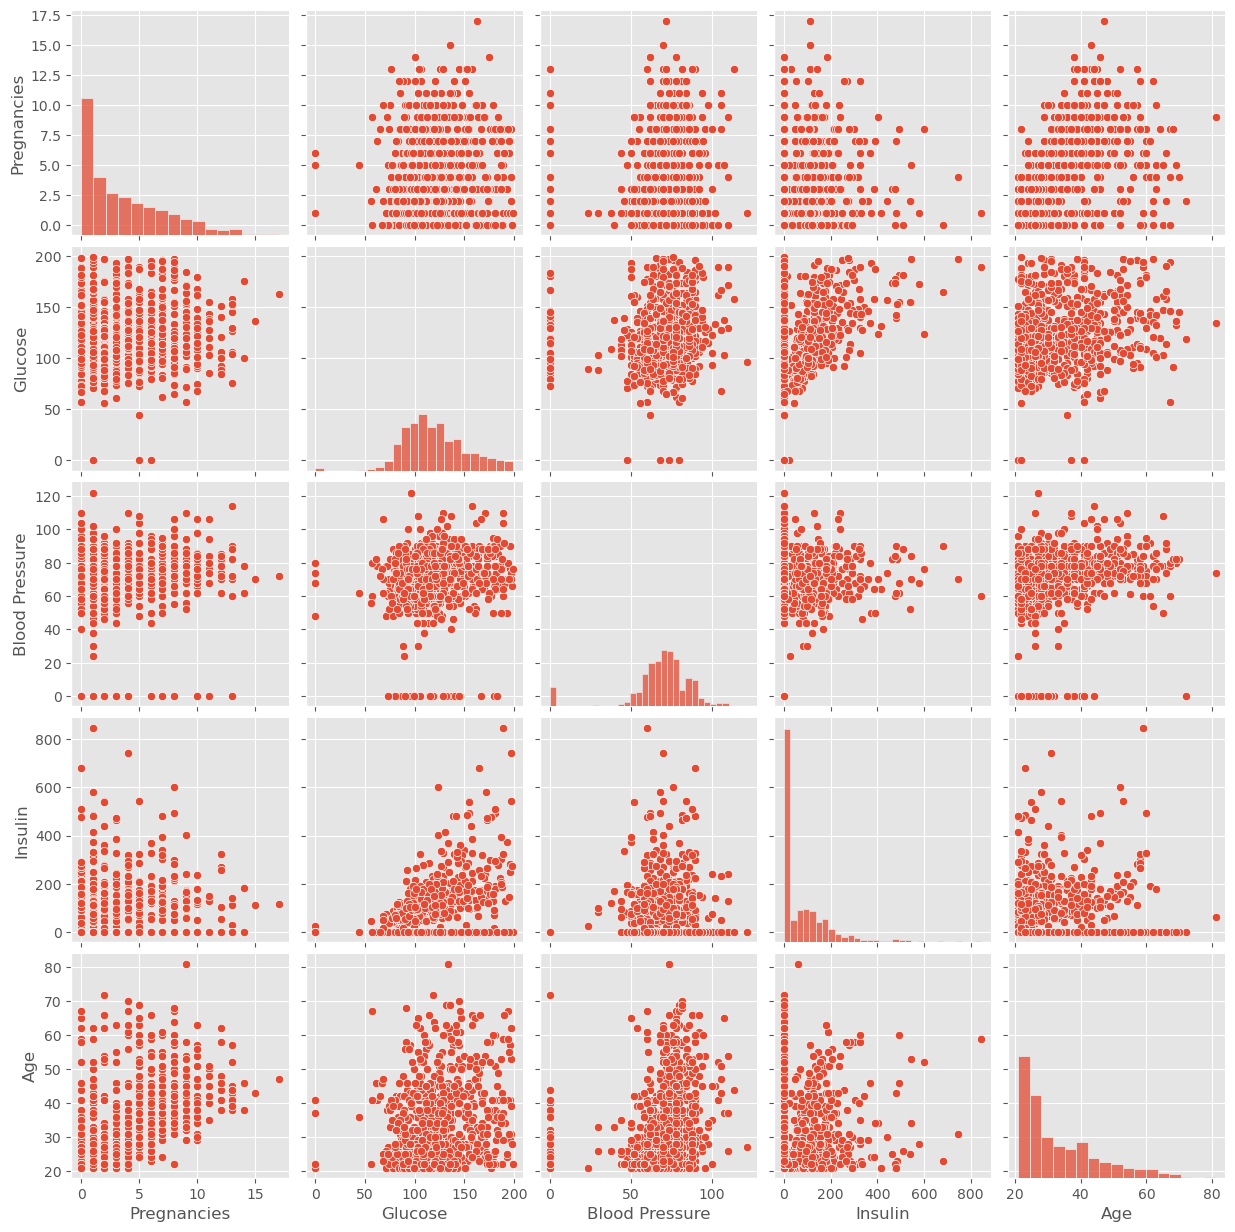

In [236]:
## Pairplot of Pregnancy, Glucose, Blood Pressure, Insulin
sns.pairplot(diab_data, vars =["Pregnancies", "Glucose", "Blood Pressure", "Insulin", "Age"])

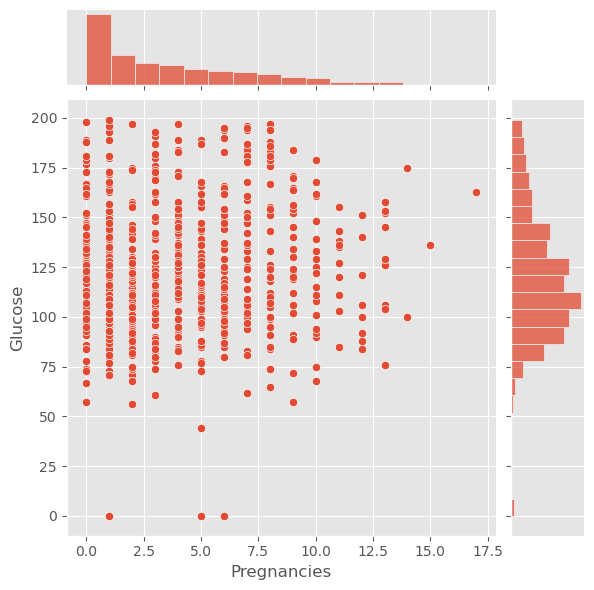

In [237]:
# Joint Plot of Pregnancy aganist Glucose
sns.jointplot(data = diab_data, x = "Pregnancies", y = "Glucose",)

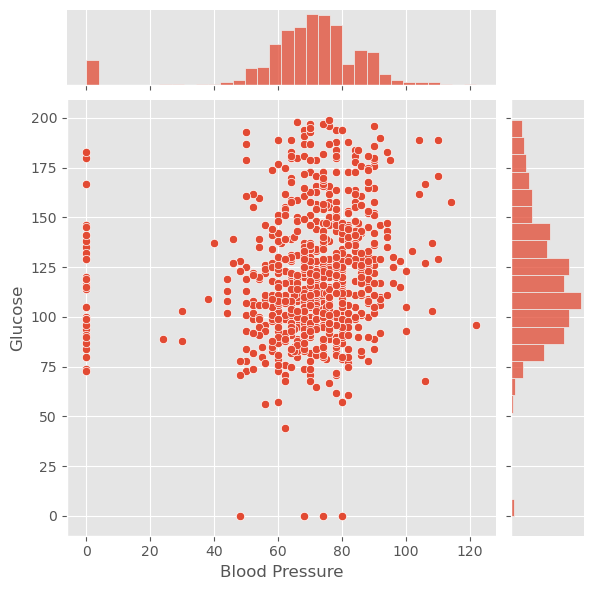

In [238]:
# Joint plot of Glucose aganist Blood Pressure
sns.jointplot(data = diab_data, x = "Blood Pressure", y = "Glucose",)

#### **Observation**:
* **We have a higher number of people with blood pressure between (40-100)mm Hg who have higher levels of glucose ranging between (50 -200)mg/dL**
*  **Normal glucose level is between 72 - 108 mg/dL. This implies we have a large number of people with higher glucose levels and high blood pressure**
*  **_This also means that a person who has blood pressure is likely to have a higher glucose level_**

*  **_This compared to the pregnancies implies that people who have been pregnant also tend to have a higher glucose level_**
*  **_In summary persons who are pregnant are likely to have a **higher glucose level and blood pressure**_**
  

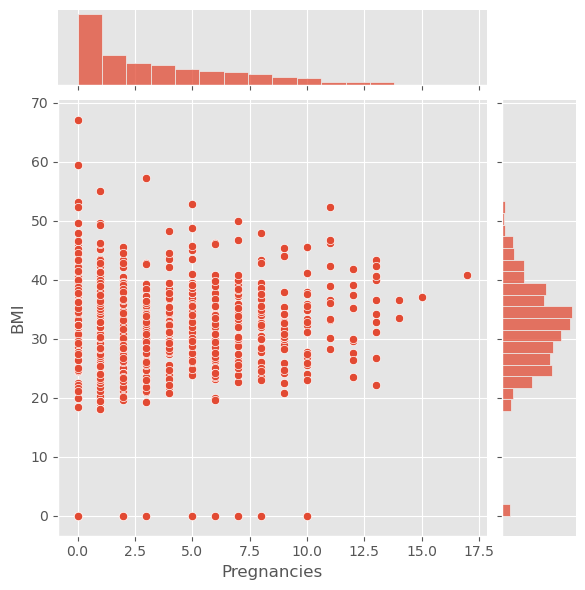

In [239]:
sns.jointplot(x = "Pregnancies", y = "BMI", data = diab_data)

#### **Observation**:
* **People without pregnancies tend to have a _higer BMI_ than people with pregnancies**
* **People with pregnancies often have BMI within the range of _(20-40) Kg/m^2_**

<Axes: xlabel='Target', ylabel='count'>

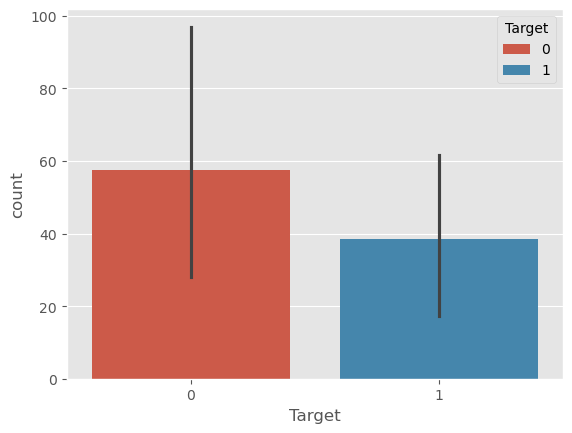

In [240]:
# Making a barplot of pregnancies against Target
sns.barplot(x = diab_data["Target"], y = diab_data["Pregnancies"].value_counts(), hue = "Target", data = diab_data)

#### **Observation**:
* **Number of persons with certain number pregnancies or no pregnancies and _not diabetic is higher_ than number of persons with pregnancies**

## 6. **Model Building: Logistic Regression, Xgboost and SVM:**

#### **a. Data splitting into feature and target variables**

In [241]:
diab_data["Target"].value_counts() # Checking the number of target variables 

Target
0    500
1    268
Name: count, dtype: int64

#### 0 --> Not Diabetic
#### 1---> Diabetic

In [242]:
X_feature = diab_data.drop(columns = ["Target"], axis = 1)

In [243]:
Y_feature = diab_data["Target"]

In [244]:
X_feature.head(5)

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [245]:
X_feature = X_feature[["Pregnancies", "Glucose", "Blood Pressure", "Skin Thickness", "Insulin", "BMI",	"Diabetes Pedigree Function", "Age"]]

In [246]:
Y_feature.head(5)

0    1
1    0
2    1
3    0
4    1
Name: Target, dtype: int64

#### **b. Performing Data Standardization or Normalization**

In [247]:
Scaler = StandardScaler()

In [248]:
X_feature = Scaler.fit_transform(X_feature)

#### **c. Splitting data into training and testing samples**

In [249]:
X_train, X_test, Y_train, Y_test = train_test_split(X_feature, Y_feature, test_size = 0.2, random_state = 42, stratify = Y_feature)

In [250]:
print(X_train.shape, X_test.shape)

(614, 8) (154, 8)


#### **d. Model Building Pipline**

In [251]:
def FitModel(X,Y, algo_name, algorithm, gridSearchParams, cv):
    np.random.seed(10)
    x_train, x_test, y_train, y_test = train_test_split (X,Y, test_size = 0.2)

    grid = GridSearchCV(estimator =algorithm, param_grid = gridSearchParams, cv = cv, scoring = "accuracy", verbose = 1, n_jobs = -1)

    grid_results = grid.fit(x_train, y_train)
    best_params = grid_results.best_params_
    pred = grid_results.predict(x_test)
    cm = confusion_matrix(y_test, pred)
    print(pred)

    print(f"Best Params = {best_params}")
    print(f"Classification report = {classification_report(y_test, pred)}")
    print(f"Accuracy_score: {accuracy_score(y_test, pred)}")
    print(f"Confusion matrix: {cm}")

#### **d.i LogisticRegression**

In [252]:
# Create regularization hyperparameter space
C= np.logspace(0, 4, 12)
penalty = ["l2"]
# Hyperparameter 
hp = dict(C = C, penalty = penalty)

In [253]:
FitModel(X_feature,Y_feature, "LogisticRegression_norm", LogisticRegression(), hp, cv = 5)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1
 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0
 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1
 1 0 0 0 1 0]
Best Params = {'C': 1.0, 'penalty': 'l2'}
Classification report =               precision    recall  f1-score   support

           0       0.75      0.93      0.83        95
           1       0.81      0.51      0.62        59

    accuracy                           0.77       154
   macro avg       0.78      0.72      0.73       154
weighted avg       0.77      0.77      0.75       154

Accuracy_score: 0.7662337662337663
Confusion matrix: [[88  7]
 [29 30]]


#### **Observation**: **LogsisticRegression Model Produced an** **_Accuracy_** of **0.76623**

#### **d.ii Xgboost**

In [254]:
params = {"n_estimators": [50, 100, 500]}

FitModel(X_feature,Y_feature, "XGBoost_norm", XGBClassifier(), params, cv = 5)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0
 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0
 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0]
Best Params = {'n_estimators': 50}
Classification report =               precision    recall  f1-score   support

           0       0.74      0.80      0.77        95
           1       0.63      0.54      0.58        59

    accuracy                           0.70       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.70      0.70      0.70       154

Accuracy_score: 0.7012987012987013
Confusion matrix: [[76 19]
 [27 32]]


#### **Observation**: **Xgboost Model Produced an** **_Accuracy_** of **0.7012**

### **d.iii. SVC Model**

In [255]:
param = { "C": [0.1, 1, 100], "gamma": [ 0.001, 0.1, 10]}
FitModel(X_feature,Y_feature, "SVC_norm", SVC(), param, cv = 5)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0
 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 0]
Best Params = {'C': 1, 'gamma': 0.1}
Classification report =               precision    recall  f1-score   support

           0       0.74      0.91      0.81        95
           1       0.76      0.47      0.58        59

    accuracy                           0.74       154
   macro avg       0.75      0.69      0.70       154
weighted avg       0.74      0.74      0.72       154

Accuracy_score: 0.7402597402597403
Confusion matrix: [[86  9]
 [31 28]]


#### **Observation**: **SVM Model Produced an** **_Accuracy_** of **0.76623**

#### **Observation**: The best performing model with the tunning parameters is LogisticRegression with an **accuracy of 0.76623**

#### **Performing Final Data Splitting**

In [256]:
X_train, X_test, Y_train, Y_test = train_test_split(X_feature, Y_feature, test_size = 0.2, random_state = 42)

In [257]:
model = LogisticRegression(C = 1.0, penalty = "l2")

In [258]:
model.fit(X_train, Y_train)

LogisticRegression()

In [259]:
y_pred_X = model.predict(X_test) # This is for the X_test Side

In [260]:
print(accuracy_score(Y_test, y_pred_X))

0.7532467532467533


In [261]:
y_pred_Y = model.predict(X_train) # This is for training side

In [262]:
print(accuracy_score(Y_train, y_pred_Y))

0.7703583061889251


In [263]:
# Checking if a person is diabetic or not diabetic

In [264]:
scaler = StandardScaler()

In [265]:
input_data =  [2,197,70,45,543,30.5,0.158,53]

In [266]:
input_data = np.asarray(input_data).reshape(1,-1)

In [267]:
Std_data = scaler.fit_transform(input_data)

In [268]:
prediction = model.predict(Std_data)
print(prediction)
if prediction[0]==0:
    print("Non-Diabetic")
else:
    print("Diabetic")

[0]
Non-Diabetic


### **Obervation**: **Overall model's perfomring accuracy is 0.7532467532467533**

### **Loading Model Into Pickle for Deployment**